 Data Exploration/Cleanup - Cindy R.

  The MPI data was an Excel workbook with 2 sheets.  I removed headers/footers and split the 2 sheets into different CSV files
 to use in thie project.  The data was grouped by country and columns not needed were removed.

 Since the airport data wasn't in a usable format, we had to key the top 20 into an excel spreadsheet and add lng/lat data
 and create a .csv file  (we learned about the negative lng/lat to the west of the prime meridian and south of the equator)

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import gmaps

import matplotlib.pyplot as plt
import scipy.stats as stats

from config import (gkey)
gmaps.configure(api_key=gkey)

# File to Load 
covid19_with_pop_land = "Covid_march15_withPopulation_land.csv"

# Read covid19 file and store into Pandas data frame
covid19_df = pd.read_csv(covid19_with_pop_land)
covid19_df

,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712,640733.2562,0.44
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139,28195.68869,14.31
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779,2315206.619,1.12
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654,452.0699393,14.36
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412,430.6744232,10.37
...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,VIR,United States Virgin Islands,NaN,1,0,0,18.3358,-64.8963,107016,362.5222542,9.34
252,197,URY,Uruguay,NaN,4,0,0,-32.5228,-55.7658,3494819,174772.9719,1.14
253,254,UZB,Uzbekistan,NaN,1,0,0,41.3775,64.5853,31767437,428650.2341,0.03
254,255,VEN,Venezuela (Bolivarian Republic of),NaN,10,0,0,6.4238,-66.5897,33116328,905593.4328,0.3


In [3]:
covid19_df.nunique()

LOC_id             256
ISOALPHA           157
COUNTRYNM          158
NAME1              101
Confirmed          131
Deaths              23
Recovered           56
Latitude           254
Longitude          255
population         253
land               253
risk_Permillion    229
dtype: int64

In [4]:
grouped_covid19_df = covid19_df.groupby("COUNTRYNM").sum().reset_index()
grouped_covid19_df

,COUNTRYNM,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Afghanistan,1,16,0,0,33.9391,67.7100
1,Albania,2,42,1,0,41.1533,20.1683
2,Algeria,3,48,4,12,28.0339,1.6596
3,Andorra,4,1,0,1,42.5063,1.5218
4,Antigua and Barbuda,5,1,0,0,17.0608,-61.7964
...,...,...,...,...,...,...,...
153,United States Virgin Islands,252,1,0,0,18.3358,-64.8963
154,Uruguay,197,4,0,0,-32.5228,-55.7658
155,Uzbekistan,254,1,0,0,41.3775,64.5853
156,Venezuela (Bolivarian Republic of),255,10,0,0,6.4238,-66.5897


In [5]:
grouped_covid19_df.nunique()


COUNTRYNM    158
LOC_id       157
Confirmed     87
Deaths        20
Recovered     31
Latitude     157
Longitude    157
dtype: int64

In [6]:
# Read Multi-dimentional poverity index file and store into Pandas data frame

multi_poverty_index = "mpi_table_2019_final_0_clean_sheet1.csv"
mpi_df = pd.read_csv(multi_poverty_index)
mpi_df

,Country,Yr and Survey 2007-2018,Index Value,Headcount (%),Intensity of deprivation(%),# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
0,Afghanistan,2015/2016 D,0.272,55.9,48.6,"19,376","19,865",0.02,24.9,18.1,10.0,45.0,45.0,54.5,NaN
1,Albania,2017/2018 D,0.003,0.7,39.1,21,21,..,0.1,5.0,28.3,55.1,16.7,14.3,1.1
2,Algeria,2012/2013 M,0.008,2.1,38.8,805,868,0.006,0.3,5.8,29.9,46.8,23.2,5.5,0.5
3,Angola,2015/2016 D,0.282,51.1,55.3,"14,725","15,221",0.024,32.5,15.5,21.2,32.1,46.8,36.6,30.1
4,Armenia,2015/2016 D,0.001,0.2,36.2,5,5,..,0.0,2.7,33.1,36.8,30.1,25.7,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Vanuatu,2007 M,0.174,38.8,44.9,85,107,0.012,10.2,32.3,21.4,22.5,56.2,12.7,13.1
97,Viet Nam,2013/2014 M,0.019,4.9,39.5,"4,530","4,677",0.01,0.7,5.6,15.2,42.6,42.2,9.8,2.0
98,Yemen,2013 D,0.241,47.7,50.5,"12,199","13,475",0.021,23.9,22.1,28.3,30.7,41.0,48.6,18.8
99,Zambia,2013/2014 D,0.261,53.2,49.1,"8,317","9,102",0.017,24.2,22.5,23.7,22.5,53.7,54.4,57.5


In [7]:
merged_df = grouped_covid19_df.merge(mpi_df, how='inner', left_on='COUNTRYNM', right_on='Country')
merged_df

,COUNTRYNM,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude,Country,Yr and Survey 2007-2018,Index Value,...,# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
0,Afghanistan,1,16,0,0,33.9391,67.7100,Afghanistan,2015/2016 D,0.272,...,"19,376","19,865",0.02,24.9,18.1,10.0,45.0,45.0,54.5,NaN
1,Albania,2,42,1,0,41.1533,20.1683,Albania,2017/2018 D,0.003,...,21,21,..,0.1,5.0,28.3,55.1,16.7,14.3,1.1
2,Algeria,3,48,4,12,28.0339,1.6596,Algeria,2012/2013 M,0.008,...,805,868,0.006,0.3,5.8,29.9,46.8,23.2,5.5,0.5
3,Armenia,7,26,0,0,40.0691,45.0382,Armenia,2015/2016 D,0.001,...,5,5,..,0.0,2.7,33.1,36.8,30.1,25.7,1.4
4,Bangladesh,20,5,0,0,23.6850,90.3563,Bangladesh,2014 D,0.198,...,"66,468","68,663",0.016,16.7,21.4,23.5,29.2,47.3,24.3,14.8
5,Bhutan,23,1,0,0,27.5142,90.4336,Bhutan,2010 M,0.175,...,272,302,0.016,14.7,17.7,24.2,36.6,39.2,8.2,1.5
6,Bolivia (Plurinational State of),24,10,0,0,-16.2902,-63.5887,Bolivia (Plurinational State of),2008 D,0.094,...,"1,958","2,254",0.014,7.1,15.7,21.6,26.6,51.8,36.4,5.8
7,Bosnia and Herzegovina,25,24,0,0,43.9159,17.6791,Bosnia and Herzegovina,2011/2012 M,0.008,...,80,77,0.002,0.1,4.1,79.7,7.2,13.1,16.9,0.1
8,Brazil,26,162,0,0,-14.2350,-51.9253,Brazil,2015 N,0.016,...,"7,913","8,041",0.008,0.9,6.2,49.8,22.9,27.3,26.5,4.8
9,Burkina Faso,29,3,0,0,12.2383,-1.5616,Burkina Faso,2010 D,0.519,...,"13,083","16,091",0.027,64.8,7.4,20.0,40.6,39.4,40.1,43.7


In [8]:
merged_sorted_df = merged_df.sort_values(by='Confirmed', ascending=False)
merged_sorted_df.head(20)

,COUNTRYNM,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude,Country,Yr and Survey 2007-2018,Index Value,...,# of poor (thousands),# of poor 2017 (thousands),Inequality among poor -Value,Population in severe multi poverty (%),Population vunerable to multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %,Standard of living %,National Poverty Line % - 2007-2018,PPP $1.90/day $ 2007-2017
13,China,1840,80848,3199,66926,1035.6150,3457.8300,China,2014 N,0.016,...,"53,688","54,437",0.005,0.3,17.1,35.2,39.2,25.5,3.1,0.7
8,Brazil,26,162,0,0,-14.2350,-51.9253,Brazil,2015 N,0.016,...,"7,913","8,041",0.008,0.9,6.2,49.8,22.9,27.3,26.5,4.8
44,Philippines,161,140,11,2,12.8797,121.7740,Philippines,2017 D,0.024,...,"6,081","6,081",0.01,1.3,7.3,20.3,31.0,48.7,21.6,7.8
27,Indonesia,119,117,5,8,-0.7893,113.9213,Indonesia,2012 D,0.028,...,"17,452","18,512",0.009,1.2,9.1,23.2,30.0,46.8,10.6,5.7
28,Iraq,121,116,10,26,33.2232,43.6793,Iraq,2018 M,0.033,...,"3,397","3,305",0.005,1.3,5.2,33.1,60.9,6.0,18.9,2.5
52,Thailand,187,114,1,35,15.8700,100.9925,Thailand,2015/2016 M,0.003,...,541,542,0.007,0.1,7.2,35.0,47.4,17.6,8.6,0.0
26,India,118,113,2,13,20.5937,78.9629,India,2015/2016 D,0.123,...,"369,546","373,735",0.014,8.8,19.3,31.9,23.4,44.8,21.9,21.2
18,Egypt,92,110,2,21,26.8206,30.8025,Egypt,2014 D,0.019,...,"4,742","5,038",0.004,0.6,6.1,39.8,53.2,7.0,27.8,1.3
57,Viet Nam,256,56,0,16,14.0583,108.2772,Viet Nam,2013/2014 M,0.019,...,"4,530","4,677",0.01,0.7,5.6,15.2,42.6,42.2,9.8,2.0
41,Pakistan,157,53,0,2,30.3753,69.3451,Pakistan,2017/2018 D,0.198,...,"76,976","75,520",0.023,21.5,12.9,27.6,41.3,31.1,24.3,3.9


In [9]:
# Select certain columns for the new dataframe

reduced_df = merged_sorted_df[['COUNTRYNM','Confirmed','Deaths','Recovered','Intensity of deprivation(%)',
                                'Population in severe multi poverty (%)',
                                'Health Contrib to Poverty (%)',
                                'Education Contrib to Poverty %']].reset_index()
reduced_df


,index,COUNTRYNM,Confirmed,Deaths,Recovered,Intensity of deprivation(%),Population in severe multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %
0,13,China,80848,3199,66926,41.3,0.3,35.2,39.2
1,8,Brazil,162,0,0,42.5,0.9,49.8,22.9
2,44,Philippines,140,11,2,41.8,1.3,20.3,31.0
3,27,Indonesia,117,5,8,40.3,1.2,23.2,30.0
4,28,Iraq,116,10,26,37.9,1.3,33.1,60.9
5,52,Thailand,114,1,35,39.1,0.1,35.0,47.4
6,26,India,113,2,13,43.9,8.8,31.9,23.4
7,18,Egypt,110,2,21,37.6,0.6,39.8,53.2
8,57,Viet Nam,56,0,16,39.5,0.7,15.2,42.6
9,41,Pakistan,53,0,2,51.7,21.5,27.6,41.3


In [10]:
reduced_df.describe()

,index,Confirmed,Deaths,Recovered,Intensity of deprivation(%),Population in severe multi poverty (%),Health Contrib to Poverty (%),Education Contrib to Poverty %
count,58.000000,58.000000,58.000000,58.00000,58.000000,58.000000,58.000000,58.000000
mean,28.500000,1421.120690,55.879310,1156.37931,44.106897,10.803448,31.862069,31.265517
std,16.886879,10612.305446,419.957729,8787.48524,6.515053,15.631255,17.176737,12.561520
min,0.000000,1.000000,0.000000,0.00000,34.400000,0.000000,10.000000,3.100000
25%,14.250000,2.000000,0.000000,0.00000,39.125000,0.525000,21.625000,23.400000
50%,28.500000,8.500000,0.000000,0.00000,42.500000,2.050000,26.650000,30.450000
75%,42.750000,41.750000,0.000000,1.00000,46.700000,14.350000,35.150000,39.425000
max,57.000000,80848.000000,3199.000000,66926.00000,61.900000,64.800000,90.400000,60.900000


Text(0, 0.5, 'Intensity of Deprivation %')

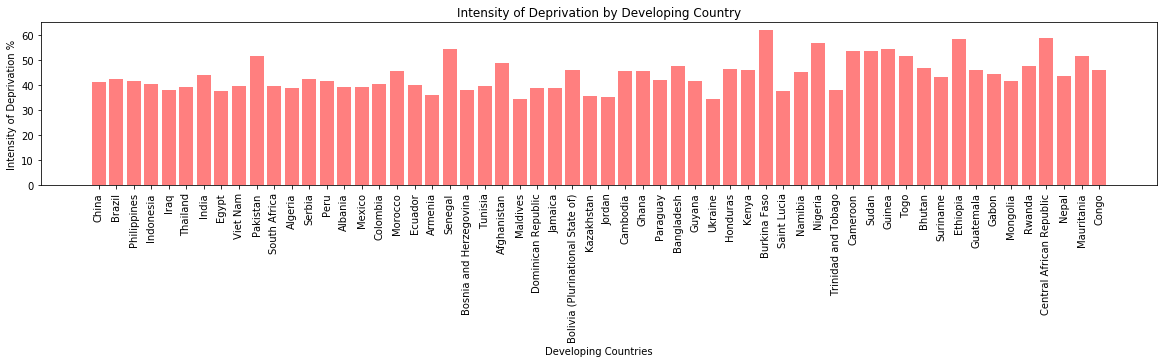

In [11]:
# Create a bar chart showing Intensity of Deprivation by Country - based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Intensity of deprivation(%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Intensity of Deprivation by Developing Country")
plt.xlabel("Developing Countries")
plt.ylabel("Intensity of Deprivation %")

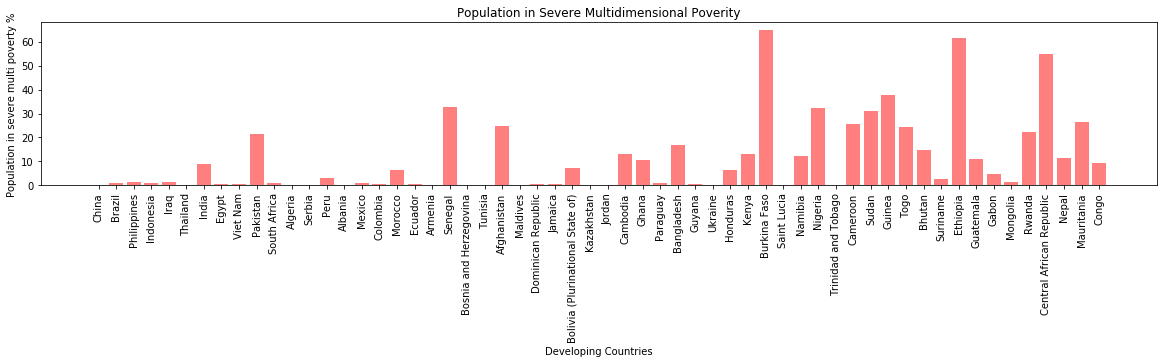

In [30]:
# Create a bar chart showing % of population in severe multi poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Population in severe multi poverty (%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Population in Severe Multidimensional Poverity")
plt.xlabel("Developing Countries")
plt.ylabel("Population in severe multi poverty %")

plt.savefig("SevereMultiPoverty.png")
plt.show()

Text(0, 0.5, 'Healty Contribution to Poverty %')

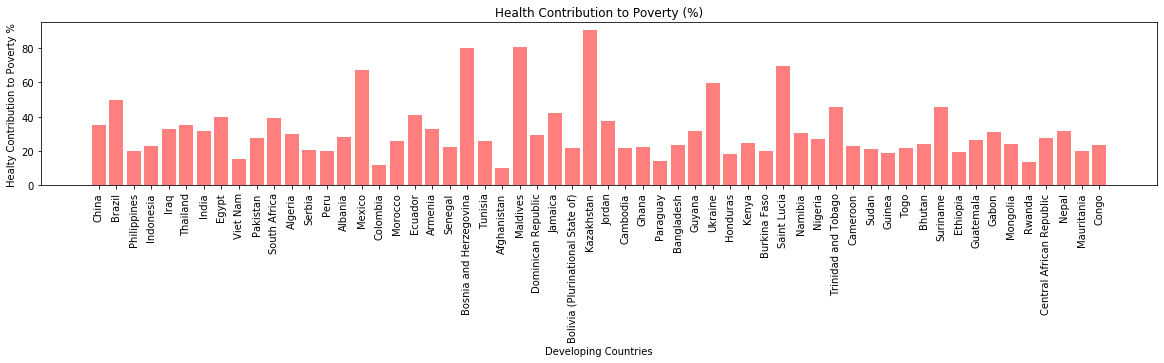

In [13]:
# Create a bar chart showing health contribution to poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Health Contrib to Poverty (%)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Health Contribution to Poverty (%)")
plt.xlabel("Developing Countries")
plt.ylabel("Healty Contribution to Poverty %")

Text(0, 0.5, 'Education Contribution to Poverty %')

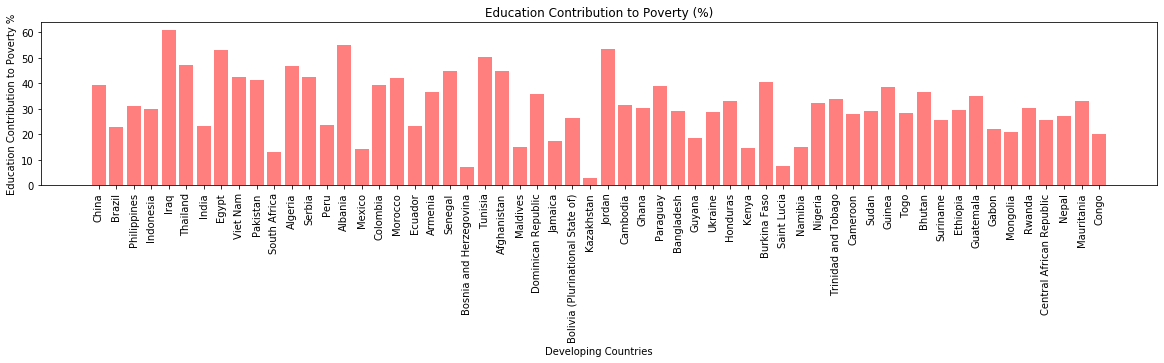

In [14]:
# Create a bar chart showing education contribution to poverty by Country 
# based on the Global Multidimensional Poverty Index

x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, reduced_df["Education Contrib to Poverty %"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["COUNTRYNM"], rotation="vertical")
plt.title("Education Contribution to Poverty (%)")
plt.xlabel("Developing Countries")
plt.ylabel("Education Contribution to Poverty %")

In [15]:
# Read passenger airline travel file and store into Pandas data frame

pass_summ = "2017_passenger_summary.csv"
pass_summ_df = pd.read_csv(pass_summ)
pass_summ_df

,Ranking,Airport,Passenger Number,Lat,Lng
0,1,"ATLANTA GA, US (ATL)",103902992,33.6407,-84.4277
1,2,"BEIJING, CN (PEK)",95786442,40.0799,116.6031
2,3,"DUBAI, AE (DXB)",88242099,25.2532,55.3657
3,4,"TOKYO, JP (HND)",85408975,35.5494,139.7798
4,5,"LOS ANGELES CA, US (LAX)",84557968,33.9416,-118.4085
5,6,"CHICAGO IL, US (ORD)",79828183,41.9742,-87.9073
6,7,"LONDON, GB (LHR)",78014598,43.0286,-81.1499
7,8,"HONG KONG, HK (HKG)",72664075,22.3080,113.9185
8,9,"SHANGHAI, CN (PVG)",70001237,31.1443,121.8083
9,10,"PARIS, FR (CDG)",69471442,49.0097,2.5479


In [16]:
# Store Covid19 'Lat' and 'Lng' into  locations and store # confirmed cases
covid19_locs = covid19_df[["Latitude", "Longitude"]]
confirmed_cases = covid19_df["Confirmed"]
confirmed_cases

0      16
1      42
2      48
3       1
4       1
       ..
251     1
252     4
253     1
254    10
255    56
Name: Confirmed, Length: 256, dtype: int64

In [17]:
# Create a 'Confirmed' Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(covid19_locs, weights=confirmed_cases, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
# Store Airport 'Lat' and 'Lng' into  locations and store airport name

airport_locs = pass_summ_df[["Lat", "Lng"]]

#airport = pass_summ_df["Airport"]
#airport

In [19]:
airport_locs

,Lat,Lng
0,33.6407,-84.4277
1,40.0799,116.6031
2,25.2532,55.3657
3,35.5494,139.7798
4,33.9416,-118.4085
5,41.9742,-87.9073
6,43.0286,-81.1499
7,22.3080,113.9185
8,31.1443,121.8083
9,49.0097,2.5479


In [20]:
airport_list = pass_summ_df["Airport"].tolist()
airport_list

['ATLANTA GA, US (ATL)',
 'BEIJING, CN (PEK)',
 'DUBAI, AE (DXB)',
 'TOKYO, JP (HND)',
 'LOS ANGELES CA, US (LAX)',
 'CHICAGO IL, US (ORD)',
 'LONDON, GB (LHR)',
 'HONG KONG, HK (HKG)',
 'SHANGHAI, CN (PVG)',
 'PARIS, FR (CDG)',
 'AMSTERDAM, NL (AMS)',
 'DALLAS/FORT WORTH TX, US (DFW)',
 'GUANGZHOU, CN (CAN)',
 'FRANKFURT, DE (FRA)',
 'ISTANBUL, TR (IST)',
 'NEW DELHI, IN (DEL)',
 'JAKARTA, ID (CGK)',
 'SINGAPORE, SG (SIN)',
 'INCHEON, KR (ICN)',
 'DENVER CO, US (DEN)']

In [21]:
# Create Airport layer
airport_layer = gmaps.symbol_layer(
    airport_locs, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=3,
    info_box_content=[f"Airport: {x}" for x in airport_list]
)

fig = gmaps.figure()
fig.add_layer(airport_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(airport_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
#  There are 197 countries total in the world
#  Developed vs. developing countries are defined by the Human Development Index(developed by the UN), political stability, 
#   GDP, industrialization and freedom. 
#  
#  MPI index shows 110 developing countries. (World Population shows 126 developing countries)
#  Since 157 countries (+1 cruise ship) have confirmed cases, then 40 countries do not have confirmed cases(197 tot countries)
#  Since 58 developing countries have confirmed cases, then 99 developed countries have confirmed cases
#  Since there are 101 developing countries, and 58 have confirmed cases, then there are 0 developing countries without
#   confirmed cases.
#
#  Hypothesis:  Confirmed cases and developing countries are independent variables

In [24]:
observed_tot_confirmed = len(grouped_covid19_df)
observed_tot_confirmed_df = pd.DataFrame([observed_tot_confirmed])
observed_tot_confirmed_df
                                         

,0
0,158


In [25]:
confirmed_developing = len(merged_sorted_df)
confirmed_developing_df = pd.DataFrame([confirmed_developing])
confirmed_developing_df

,0
0,58


In [26]:
tot_developing = len(mpi_df)
tot_developing_df = pd.DataFrame([tot_developing])
tot_developing_df

,0
0,101


In [27]:
critical_value = stats.chi2.ppf(q=0.95, df = 1)
critical_value

3.841458820694124

In [29]:
#  Compare the actual # of confirmed cases in developing countries to the expected value of confirmed cases 
#  (total # of countries)

stats.chisquare(confirmed_developing_df, tot_developing_df)

Power_divergenceResult(statistic=array([18.30693069]), pvalue=array([nan]))

 Conclusion:  Since the chi-square value of 18.3 exceeds the critical 
 value of 3.8 we conclude that the difference seen in 
 number of confirmed cases in developing countries in insigificant. 

Final Data Analysis (Cindy):

4. Socio-economic background of those affected

Our analysis showed that developed countries are the ones more affected by COVID-19 than the developing countries.  42% percent of the developing countries have not reported any confirmed cases.  Only 1 of the 58 developing countries (China) is in the top 20 affected countries and it’s multidimensional poverty percentage is very small compared to many of the other developing countries.  53 % of the developed countries have reported confirmed cases.

 
5.  Correlation between air travel and the spread of COVID-19
Looking at the location of the confirmed cases and also looking at the location of the top 20 major world airports, there seems to be some correlation between major airports such as several around China and around France and Germany but there isn’t a significant correlation.  Most of the confirmed cases in the US, for example, are on the east and west coasts versus around the major airports.




